In [1]:
import numpy as np
from os import listdir
from os import path
import json
import matplotlib.pyplot as plt
from matplotlib import colors
import pickle

In [2]:
from learn import *
import utils

Task number: 298
Number of train examples 2
0
     input shapes [(6, 6), (6, 6)]
     output shapes [(6, 6), (6, 6)]


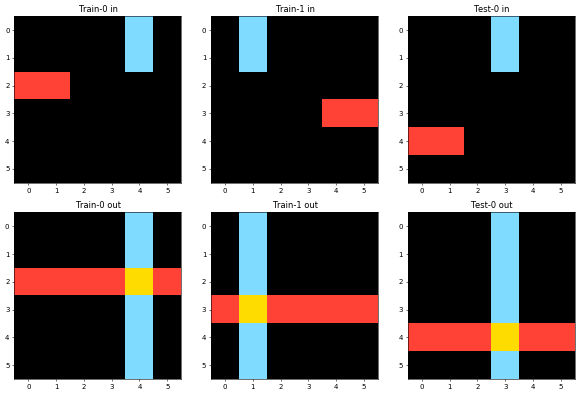

In [3]:
tr, te, ev = utils.get_data()
t = Task(298, tr[298])
t.summary()
t.plot()

In [4]:
IM = t.train[0].input

In [5]:
IM + 2

array([[2, 2, 2, 2, 10, 2],
       [2, 2, 2, 2, 10, 2],
       [4, 4, 2, 2, 2, 2],
       [2, 2, 2, 2, 2, 2],
       [2, 2, 2, 2, 2, 2],
       [2, 2, 2, 2, 2, 2]], dtype=object)

In [6]:
IM.m

array([[0, 0, 0, 0, 8, 0],
       [0, 0, 0, 0, 8, 0],
       [2, 2, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]], dtype=object)

In [10]:
from feature_calc import FeatureCalculator
from itertools import product
from datetime import datetime
features = []

xsh, ysh = np.shape(IM)

b1 = datetime.now()
for y, x in product(range(ysh), range(xsh)):
    c = IM[y][x]
    fc = FeatureCalculator(c.y, c.x, c.v, IM)
    features.append(fc.features().T)
#     print(y,x)
#     features[y,x] = fc.features()
b2 = datetime.now()
diff = (b1 - b2)
print('took',diff.microseconds / 1000, 'miliseconds')
f = np.array(features)
f = np.reshape(f, (ysh, xsh, *f.shape[1:]))
f.shape

took 989.68 miliseconds


(6, 6, 6, 6, 11)

In [11]:
f[2,0,:]

array([[[-2, 0, 1, 0, False, True, False, 0, -2, 2, 2],
        [-1, 0, 0, 0, False, True, False, 0, -2, 2, 2],
        [0, 0, 0, 0, True, False, False, 4, 0, 0, 4],
        [1, 0, 1, 0, False, True, False, 0, -2, 2, 2],
        [2, 0, 2, 0, False, True, False, 0, -2, 2, 2],
        [3, 0, 2, 0, False, True, False, 0, -2, 2, 2]],

       [[-2, 1, 1, 1, False, True, False, 0, -2, 2, 2],
        [-1, 1, 0, 1, False, True, False, 0, -2, 2, 2],
        [0, 1, 0, 1, True, False, False, 4, 0, 0, 4],
        [1, 1, 1, 1, False, True, False, 0, -2, 2, 2],
        [2, 1, 2, 1, False, True, False, 0, -2, 2, 2],
        [3, 1, 2, 1, False, True, False, 0, -2, 2, 2]],

       [[-2, 2, 1, 2, False, True, False, 0, -2, 2, 2],
        [-1, 2, 0, 2, False, True, False, 0, -2, 2, 2],
        [0, 2, 0, 2, False, True, False, 0, -2, 2, 2],
        [1, 2, 1, 2, False, True, False, 0, -2, 2, 2],
        [2, 2, 2, 2, False, True, False, 0, -2, 2, 2],
        [3, 2, 2, 2, False, True, False, 0, -2, 2, 2]],



In [12]:
IM.m > 0

array([[False, False, False, False,  True, False],
       [False, False, False, False,  True, False],
       [ True,  True, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False]])

In [13]:
active = f[IM.m > 0]
active.shape

(4, 6, 6, 11)

In [14]:
c1, c2 = active[0, :], active[2,:]

In [15]:
# c1.y, c1.x, c1.v, c1.shape
# c1 is (0, 4) c2 is(0 , 2)1
# t == True

# np.where(c1[0,:])

In [16]:
# print(np.dstack(np.nonzero(c1 == c2)))
feat = np.reshape(c1, (-1, c1.shape[-1])).T

In [17]:
from collections import Counter

In [18]:
counts = []
for i in range(feat.shape[0]):
    counts.append(Counter(feat[i]))

In [19]:
counts

[Counter({0: 6, 1: 6, 2: 6, 3: 6, 4: 6, 5: 6}),
 Counter({-4: 6, -3: 6, -2: 6, -1: 6, 0: 6, 1: 6}),
 Counter({0: 12, 1: 12, 2: 12}),
 Counter({2: 6, 3: 6, 4: 6, 5: 6, 0: 6, 1: 6}),
 Counter({False: 34, True: 2}),
 Counter({True: 34, False: 2}),
 Counter({False: 36}),
 Counter({0: 32, 16: 2, 64: 2}),
 Counter({-8: 32, -6: 2, 0: 2}),
 Counter({8: 32, 6: 2, 0: 2}),
 Counter({8: 32, 10: 2, 16: 2})]

In [20]:
flattened = f.reshape((-1, f.shape[-1]))
flattened.shape

(1296, 11)

In [28]:
from collections import Sequence

def recursive_map (seq, func):
    for item in seq:
        if isinstance(item, Sequence):
            yield type(item)(recursive_map(item, func))
        else:
            yield func(item)

/home/daniel/.local/opt/anaconda3/envs/ML/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  """Entry point for launching an IPython kernel.


In [60]:
temp = map(list, flattened)
s = recursive_map(list(temp), str)
sr = list(map(str, range(flattened.shape[1])))
# list(map(lambda a: '--'.join(*tuple(zip(a, sr))), s))
# list(s)
x = map(lambda a: tuple(zip(a, sr)), s)
tupled = list(x)

In [48]:
# f1 = lambda elem: str(elem) + 
# f = lambda l: str(l) 
# temp = map()
# flattened = list()
# np.shape(flattened)

SyntaxError: invalid syntax (<ipython-input-48-2f42d4c1995d>, line 1)

In [61]:
from efficient_apriori import apriori

In [67]:
itemsets, rules = apriori(tupled, min_support=0.01,  min_confidence=1)

In [70]:
rules

[{('-1', '0')} -> {('0', '2')},
 {('-1', '1')} -> {('5', '3')},
 {('-2', '0')} -> {('1', '2')},
 {('-2', '1')} -> {('0', '7')},
 {('-2', '1')} -> {('4', '3')},
 {('-2', '8')} -> {('0', '7')},
 {('-2', '8')} -> {('2', '10')},
 {('-2', '8')} -> {('2', '9')},
 {('-2', '8')} -> {('False', '4')},
 {('-2', '8')} -> {('False', '6')},
 {('-2', '8')} -> {('True', '5')},
 {('-3', '0')} -> {('0', '7')},
 {('-3', '0')} -> {('2', '2')},
 {('-3', '0')} -> {('False', '5')},
 {('-3', '1')} -> {('3', '3')},
 {('-4', '0')} -> {('0', '7')},
 {('-4', '0')} -> {('2', '2')},
 {('-4', '0')} -> {('False', '5')},
 {('-4', '1')} -> {('2', '3')},
 {('-5', '0')} -> {('0', '7')},
 {('-5', '0')} -> {('1', '2')},
 {('-5', '0')} -> {('False', '5')},
 {('-5', '1')} -> {('0', '7')},
 {('-5', '1')} -> {('1', '3')},
 {('-5', '1')} -> {('False', '5')},
 {('-8', '8')} -> {('0', '7')},
 {('-8', '8')} -> {('8', '10')},
 {('-8', '8')} -> {('8', '9')},
 {('-8', '8')} -> {('False', '4')},
 {('-8', '8')} -> {('False', '6')},
 {(

In [66]:
itemsets

{1: {(('-1', '0'),): 180,
  (('-1', '1'),): 180,
  (('-2', '0'),): 144,
  (('-2', '1'),): 144,
  (('-2', '8'),): 64,
  (('-3', '0'),): 108,
  (('-3', '1'),): 108,
  (('-4', '0'),): 72,
  (('-4', '1'),): 72,
  (('-5', '0'),): 36,
  (('-5', '1'),): 36,
  (('-8', '8'),): 64,
  (('0', '0'),): 216,
  (('0', '1'),): 216,
  (('0', '10'),): 1024,
  (('0', '2'),): 432,
  (('0', '3'),): 216,
  (('0', '7'),): 1280,
  (('0', '8'),): 1032,
  (('0', '9'),): 1032,
  (('1', '0'),): 180,
  (('1', '1'),): 180,
  (('1', '2'),): 432,
  (('1', '3'),): 216,
  (('2', '0'),): 144,
  (('2', '1'),): 144,
  (('2', '10'),): 128,
  (('2', '2'),): 432,
  (('2', '3'),): 216,
  (('2', '8'),): 64,
  (('2', '9'),): 128,
  (('3', '0'),): 108,
  (('3', '1'),): 108,
  (('3', '3'),): 216,
  (('4', '0'),): 72,
  (('4', '1'),): 72,
  (('4', '3'),): 216,
  (('5', '0'),): 36,
  (('5', '1'),): 36,
  (('5', '3'),): 216,
  (('8', '10'),): 128,
  (('8', '8'),): 64,
  (('8', '9'),): 128,
  (('False', '4'),): 264,
  (('False', '5'),